## Initials

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import torch
# print(torch.cuda.is_available())
# a = [1,2,3,4,5,6,7,8,9,0]
# print(a)
# a = torch.tensor(a).clone().detach().cuda()
# print(a)

# import tensorflow as tf
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
# raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))


In [3]:
!pip install tensorflow opencv-contrib-python youtube-dl moviepy pydot
!pip install git+https://github.com/TahaAnwar/pafy.git#egg=pafy

# Import the required libraries.
import os
import cv2
import pafy
import math
import random
import numpy as np
import datetime as dt
import tensorflow as tf
from collections import deque
import matplotlib.pyplot as plt

from moviepy.editor import *
%matplotlib inline

import torch
import torch.nn as nn
from torchvision import models

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import ConvLSTM2D, MaxPooling3D, TimeDistributed, Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 19.3 MB/s eta 0:00:00
  Cloning https://github.com/TahaAnwar/pafy.git to /tmp/pip-install-ktgypoqc/pafy_67d2d86cb3a54ff48b7e76bbb4f56778
  Running command git clone --filter=blob:none --quiet https://github.com/TahaAnwar/pafy.git /tmp/pip-install-ktgypoqc/pafy_67d2d86cb3a54ff48b7e76bbb4f56778
  Resolved https://github.com/TahaAnwar/pafy.git to commit 2f3c473b3df7961721d07e1504675313afd1d2cb
  Preparing metadata (setup.py) ... done
  Created wheel for pafy: filename=pafy-0.5.5-py2.py3-none-any.whl size=35693 sha256=94cbb1a7d939964f8fc362cfdec11ed2de151729a00e741773fd8ec1c82057b9
  Stored in directory: /tmp/pip-ephem-wheel-cache-ad0t2ti5/wheels/38/75/72/035d5f91837fe6fdd9ee6ec71eadaf7829068a58f4789a63cc
Successfully built pafy


## Importing DataSet

check
16m 12s
completed at 8:30 AM

In [ ]:
# import os
# import cv2
# import numpy as np
# import torch
# import torch.nn as nn
# import torchvision.models as models
# from torch.utils.data import DataLoader, Dataset
# from torchvision import transforms
# import matplotlib.pyplot as plt
# from google.colab.patches import cv2_imshow


# class HeartRateDataset(Dataset):
#     def __init__(self, data_path, frame_length, pixel_size):
#         self.data_path = data_path
#         self.frame_length = frame_length
#         self.pixel_size = pixel_size
#         self.video_paths, self.labels = self._read_data()

#     def __len__(self):
#         return len(self.video_paths)

#     def __getitem__(self, index):
#         self.index = index
#         video_path = self.video_paths[index]
#         label = self.labels[index]
#         # print(video_path, index, label)
#         clips, clips_labels = self._load_video(video_path, label)
#         return clips, clips_labels

#     def _read_data(self):
#         video_paths = []
#         labels = []
#         # Excluding Some Videos for testing Purposes
#         # excluded_directory = []
#         excluded_directory = [              # subject1, 2, 3 & 4 shouldn't be in this list because of them all others are excluded too
#                                             # Excluded cases 11, 18, 20, 24 due to wrond dataset values
#         "/content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject8",
#         "/content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject9",
#         "/content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject17",
#         "/content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject23",
#         "/content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject27",
#         "/content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject31",

#         "/content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject11",
#         "/content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject18",
#         "/content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject20",
#         "/content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject24"
#     ]
# # Skipping /content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject17/vid.avi due to being in an excluded directory
# # Skipping /content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject23/vid.avi due to being in an excluded directory
# # Skipping /content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject31/vid.avi due to being in an excluded directory
# # Skipping /content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject8/vid.avi due to being in an excluded directory
# # Skipping /content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject9/vid.avi due to being in an excluded directory

#         for root, _, files in os.walk(self.data_path):
#           if "vid.avi" in files and "ground_truth.txt" in files:
#               video_path = os.path.join(root, "vid.avi")
#               ground_truth_file = os.path.join(root, "ground_truth.txt")

#               # Check if the current root directory should be excluded
#               if any(excluded_dir in root for excluded_dir in excluded_directory):
#                 # video_path = os.path.join(root, "vid.avi")
#                 # ground_truth_file = os.path.join(root, "ground_truth.txt")
#                 print(f"Skipping {video_path} due to being in an excluded directory")
#                 continue
#               else:
#                 with open(ground_truth_file, 'r') as f:
#                     # Read the first two lines
#                     lines = f.readlines()
#                     if len(lines) >= 2:
#                         # Split the second line into numerical values
#                         label_line = lines[1].strip()
#                         label_values = [float(val) for val in label_line.split()]
#                         video_paths.append(video_path)
#                         labels.append(label_values)
#                     else:
#                         print(f"Skipping {video_path} due to missing second line in ground_truth.txt")
#         return video_paths, labels


#     def _load_video(self, video_path, label):
#         cap = cv2.VideoCapture(video_path)
#         video_frames = []
#         frame_indices = []
#         frame_count = 0
#         while True:
#             ret, frame = cap.read()
#             # plt.subplot(3,3,ret);plt.imshow(frame)
#             if not ret:
#                 break
#             video_frames.append(frame)
#             frame_indices.append(frame_count)
#             frame_count += 1
#             # plt.subplot(50,50,frame_count);plt.imshow(frame)
#         cap.release()

#         # print(frame_indices)
#         # Randomly choose 16 frame indices

#         if len(frame_indices) < self.frame_length:
#           print("Error: Not enough frames for sampling.")
#           return 0, 0  # Return None to indicate that no clips were generated

#         selected_indices = np.random.choice(frame_indices, size=self.frame_length, replace=False)
#         # Convert labels to a NumPy array
#         labels_array = np.array(label)
#         # Use the selected indices to retrieve corresponding heart rate labels
#         selected_labels = labels_array[selected_indices]  # Select the appropriate columns
#         selected_frames = [video_frames[i] for i in selected_indices]
#         selected_frames = self._preprocess_frames(selected_frames)
#         video_tensor = torch.tensor(selected_frames)  # Convert NumPy array to PyTorch tensor
#         # self._imshow_frames(selected_frames)

#         if len(video_tensor) < self.frame_length:
#           num_repeats = self.frame_length // len(video_tensor) + 1
#           video_tensor = video_tensor.repeat(num_repeats, 1, 1, 1)

#         # Create clips with the selected frames and corresponding labels
#         clips = []
#         clips_labels = []
#         for i in range(len(selected_frames) - self.frame_length + 1):
#             clip = selected_frames[i:i + self.frame_length]
#             clip_labels = selected_labels[i:i + self.frame_length]
#             # clips.append(clip)
#             clips.append(clip)  # Include the selected labels for each clip
#             clips_labels.append(clip_labels)

#         self._imshow_clips(clips, clips_labels)
#         return clips, clips_labels

#     def _preprocess_frames(self, video_frames):
#         # Resize and normalize frames
#         processed_frames = [cv2.resize(frame, (self.pixel_size, self.pixel_size)) for frame in video_frames]
#         processed_frames = np.array(processed_frames, dtype=np.float32)
#         processed_frames /= 255.0  # Normalize to [0, 1]
#         return processed_frames

#     def _imshow_frames(self, video_frames):
#         # Resize and normalize frames
#         selected_frames = video_frames * 255.0
#         # Save the frames to a directory
#         output_dir = "/content/SAVE_FRAMES/View_Frames"
#         os.makedirs(output_dir, exist_ok=True)
#         for idx, frame in enumerate(selected_frames):
#             frame_filename = os.path.join(output_dir, f"frame_{idx}.png")
#             plt.imshow(frame)
#             cv2.imwrite(frame_filename, frame)
#         # Visualize frames outside the loop
#         num_visualize = min(3, len(selected_frames))  # Ensure not to exceed available frames
#         visualize_filenames = np.random.choice(os.listdir(output_dir), size=num_visualize, replace=False)
#         print("Filenames in output directory:", visualize_filenames)
#         for filename in visualize_filenames:
#             frame_path = os.path.join(output_dir, filename)
#             frame = cv2.imread(frame_path)
#             plt.imshow(frame)
#             plt.title(f"Selected Frame: {filename}")
#             plt.show()

#     def _imshow_clips(self, clips, labels):
#       output_dir = "/content/SAVE_FRAMES/View_Clips"
#       os.makedirs(output_dir, exist_ok=True)

#       for idx, (clip, label) in enumerate(zip(clips, labels)):
#           clip_frames = [frame * 255.0 for frame in clip]  # Multiply each frame by 255.0
#           clip_filename = os.path.join(output_dir, f"Clip_{self.index}_{idx}.avi")  # Include self.index in the filename

#           clip_height, clip_width = clip_frames[0].shape[:2]
#           fourcc = cv2.VideoWriter_fourcc(*'XVID')
#           clip_writer = cv2.VideoWriter(clip_filename, fourcc, 30.0, (clip_width, clip_height))
#           for frame in clip_frames:
#               frame = frame.astype(np.uint8)
#               clip_writer.write(frame)
#           clip_writer.release()
#       # Rest of the visualization code
#       num_visualize = min(3, len(clips))  # Visualize up to 3 clips
#       visualize_indices = np.random.choice(len(clips), size=num_visualize, replace=False)
#       for idx in visualize_indices:
#           clip = clips[idx]
#           label = labels[idx]
#           plt.figure(figsize=(12, 4))
#           for i, frame in enumerate(clip):
#               plt.subplot(1, len(clip), i + 1)
#               plt.imshow(frame)
#               plt.title(i + 1)
#               plt.axis('off')
#           plt.suptitle(f"Selected Clip with Label: {label}", fontsize=14)
#           plt.show()




In [31]:
import os
import cv2
import numpy as np
import torch
from torch.utils.data import DataLoader, Dataset

class HeartRateDataset(Dataset):
    def __init__(self, data_path, pixel_size, sequence_length):
        self.data_path = data_path
        self.pixel_size = pixel_size
        self.sequence_length = sequence_length
        self.video_paths, self.labels, self.frame_counts = self._read_data_and_frames()

    def __len__(self):
        return sum(frame_count // self.sequence_length for frame_count in self.frame_counts)

    def __getitem__(self, index):
        video_idx = 0
        while index >= self.frame_counts[video_idx] // self.sequence_length:
            index -= self.frame_counts[video_idx] // self.sequence_length
            video_idx += 1

        frames, labels = self._load_frames(self.video_paths[video_idx], index * self.sequence_length)
        print(f"Reading frames from {self.video_paths[video_idx]} (Video {video_idx + 1}/{len(self.video_paths)})")
         # Move frames and labels to GPU if available
        if torch.cuda.is_available():
            frames = frames.clone().detach().cuda()
            labels = labels.clone().detach().cuda()
        else:
            frames = frames.clone().detach()
            labels = labels.clone().detach()

        return frames, labels


    def _read_data_and_frames(self):
        video_paths = []
        labels = []
        frame_counts = []

        excluded_directory = [              # subject1, 2, 3 & 4 shouldn't be in this list because of them all others are excluded too
                                            # Excluded cases 11, 18, 20, 24 due to wrond dataset values
        "/content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject8",
        "/content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject9",
        "/content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject17",
        "/content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject23",
        "/content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject27",
        "/content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject31",

        "/content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject11",
        "/content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject18",
        "/content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject20",
        "/content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject24"
    ]

        for root, _, files in os.walk(self.data_path):
            if "vid.avi" in files and "ground_truth.txt" in files:
                video_path = os.path.join(root, "vid.avi")
                ground_truth_file = os.path.join(root, "ground_truth.txt")

                if any(excluded_dir in root for excluded_dir in excluded_directory):
                    print(f"Skipping {video_path} due to being in an excluded directory")
                    continue
                else:
                    with open(ground_truth_file, 'r') as f:
                        lines = f.readlines()
                        if len(lines) >= 2:
                            label_line = lines[1].strip()
                            label_values = [float(val) for val in label_line.split()]
                            video_paths.append(video_path)
                            labels.append(label_values)
                            frame_counts.append(len(label_values))
                        else:
                            print(f"Skipping {video_path} due to missing second line in ground_truth.txt")

        return video_paths, labels, frame_counts

    def _load_frames(self, video_path, start_frame):
        cap = cv2.VideoCapture(video_path)
        frames = []
        labels = []
        cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)
        for _ in range(self.sequence_length):
            ret, frame = cap.read()
            if not ret:
                break
            frames.append(self._preprocess_frames(frame))
            labels.append(self.labels[self.video_paths.index(video_path)][start_frame])
            start_frame += 1
        cap.release()

        frames = np.array(frames)
        frames = torch.tensor(frames)
        labels = torch.tensor(labels)
        return frames, labels

    def _preprocess_frames(self, frame):
        processed_frame = cv2.resize(frame, (self.pixel_size, self.pixel_size))
        processed_frame = processed_frame.astype(np.float32) / 255.0
        return processed_frame

# Set your parameters
data_path = "/content/drive/MyDrive/UBFC_DATASET/DATASET_2"
pixel_size = 250  # Resize frames to this pixel size
sequence_length = 60  # Number of frames in a sequence

# Create dataset and dataloader
dataset = HeartRateDataset(data_path, pixel_size, sequence_length)
dataloader = DataLoader(dataset, batch_size=4, shuffle=False)

# Create separate data loaders for training and validation
train_dataset = HeartRateDataset(data_path, pixel_size, sequence_length)
train_dataloader = DataLoader(train_dataset, batch_size=1, shuffle=True)

val_dataset = HeartRateDataset(data_path, pixel_size, sequence_length)
val_dataloader = DataLoader(val_dataset, batch_size=1, shuffle=False)

# Test the dataloader
for frames, labels in dataloader:
    # frames: (batch_size, sequence_length, channels, height, width)
    # labels: (batch_size, sequence_length, label_dimensions)
    print("Frames shape:", frames.shape)
    print("Labels shape:", labels.shape, labels)
    break  # Break after processing the first batch

Skipping /content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject11/vid.avi due to being in an excluded directory
Skipping /content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject17/vid.avi due to being in an excluded directory
Skipping /content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject18/vid.avi due to being in an excluded directory
Skipping /content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject20/vid.avi due to being in an excluded directory
Skipping /content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject23/vid.avi due to being in an excluded directory
Skipping /content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject24/vid.avi due to being in an excluded directory
Skipping /content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject27/vid.avi due to being in an excluded directory
Skipping /content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject31/vid.avi due to being in an excluded directory
Skipping /content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject8/vid.avi due to being in an excluded directory
Sk

In [18]:
vid, label = next(iter(dataloader))

Reading frames from /content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject1/vid.avi (Video 1/32)
Reading frames from /content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject1/vid.avi (Video 1/32)
Reading frames from /content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject1/vid.avi (Video 1/32)
Reading frames from /content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject1/vid.avi (Video 1/32)


In [19]:
mean_label= label.mean(dim=1, keepdim=True)

In [20]:
mean_label.cpu().shape

torch.Size([4, 1])

In [9]:
videos = tf.data.Dataset.from_tensor_slices(vid.cpu())
labels = tf.data.Dataset.from_tensor_slices(mean_label[1,].cpu())
dataset = tf.data.Dataset.zip((videos, labels))
Videos_training = (dataset
                   .prefetch(tf.data.AUTOTUNE)
                   .batch(8)
                   .repeat()
                   )

In [22]:
import os
from torch.utils.data import DataLoader
testSetDirectories = [
        "/content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject8",
        "/content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject9",
        "/content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject17",
        "/content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject23",
        "/content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject27",
        #"/content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject31"
    ]



for directory in testSetDirectories:
    # if os.path.exists(directory):
        # Create a dataset instance for each directory
        dataset = HeartRateDataset(directory, pixel_size, sequence_length)

# Create a DataLoader for each dataset
test_dataloaders = DataLoader(dataset, batch_size=1, shuffle=False)

In [23]:
len(dataset)

23

In [25]:
img, l = next(iter(test_dataloaders))

Reading frames from /content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject27/vid.avi (Video 1/1)


In [28]:
# Iterate through the dataloaders if needed
# for dataloader in test_dataloaders:
vid, label = next(iter(test_dataloaders))
# print(test_dataloaders)

Reading frames from /content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject27/vid.avi (Video 1/1)


In [32]:
vid_train, label_train = next(iter(dataloader))
mean_label_train= label_train.mean(dim=1, keepdim=True)

vid_val, label_val = next(iter(test_dataloaders))
mean_label_val= label_val.mean(dim=1, keepdim=True)

videos_v = tf.data.Dataset.from_tensor_slices(vid_val.cpu())
labels_v = tf.data.Dataset.from_tensor_slices(mean_label_val.cpu())
dataset_v = tf.data.Dataset.zip((videos_v, labels_v))
Videos_val = (dataset_v
                   .prefetch(tf.data.AUTOTUNE)
                   .batch(1)
                   .repeat()
                   )

videos = tf.data.Dataset.from_tensor_slices(vid_train.cpu())
labels = tf.data.Dataset.from_tensor_slices(mean_label_train.cpu())
dataset = tf.data.Dataset.zip((videos, labels))
Videos_training = (dataset
                   .prefetch(tf.data.AUTOTUNE)
                   .batch(1)
                   .repeat()
                   )

def create_convlstm_model():
    '''
    This function will construct the required convlstm model.
    Returns:
        model: It is the required constructed convlstm model.
    '''

    model = Sequential()


    model.add(ConvLSTM2D(filters = 16, kernel_size = (3, 3), activation = 'tanh',data_format = "channels_last",
                         recurrent_dropout=0.2, return_sequences=True, input_shape = (60,
                                                                                      250, 250, 3)))

    model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
    model.add(TimeDistributed(Dropout(0.2)))

    model.add(ConvLSTM2D(filters = 32, kernel_size = (3, 3), activation = 'tanh', data_format = "channels_last",
                         recurrent_dropout=0.2, return_sequences=True))

    model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
    model.add(TimeDistributed(Dropout(0.2)))

    model.add(ConvLSTM2D(filters = 64, kernel_size = (3, 3), activation = 'tanh', data_format = "channels_last",
                         recurrent_dropout=0.2, return_sequences=True))

    model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
    model.add(TimeDistributed(Dropout(0.2)))

    model.add(ConvLSTM2D(filters = 128, kernel_size = (3, 3), activation = 'tanh', data_format = "channels_last",
                         recurrent_dropout=0.2, return_sequences=True))

    model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
    #model.add(TimeDistributed(Dropout(0.2)))

    model.add(Flatten())

    model.add(Dense(1, activation = 'linear'))

    ########################################################################################################################

    # Display the models summary.
    #model.summary()

    # Return the constructed convlstm model.
    return model

model = create_convlstm_model()
# Compile the model and specify loss function, optimizer and metrics values to the model
model.compile(loss =tf.keras.losses.MeanSquaredError(), optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-4))

# Start training the model.
convlstm_model_training_history = model.fit(Videos_training, epochs = 50, steps_per_epoch=(32) ,batch_size = 1,validation_data=Videos_val, validation_steps=(32))

Reading frames from /content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject1/vid.avi (Video 1/32)
Reading frames from /content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject1/vid.avi (Video 1/32)
Reading frames from /content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject1/vid.avi (Video 1/32)
Reading frames from /content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject1/vid.avi (Video 1/32)
Reading frames from /content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject27/vid.avi (Video 1/1)
Epoch 1/50
32/32 [==============================] - 92s 2s/step - loss: 1320.5569 - val_loss: 8.6413
Epoch 2/50
32/32 [==============================] - 66s 2s/step - loss: 12.7809 - val_loss: 53.4647
Epoch 3/50
32/32 [==============================] - 66s 2s/step - loss: 1.6274 - val_loss: 35.5348
Epoch 4/50
32/32 [==============================] - 69s 2s/step - loss: 1.0128 - val_loss: 38.0473
Epoch 5/50
32/32 [==============================] - 67s 2s/step - loss: 1.0793 - val_loss: 38.0819
Epoch 6/50
32/32 [====

KeyboardInterrupt: ignored

In [ ]:
# Save the Keras model
model.save('/content/drive/MyDrive/1 Google Colab/CNN Internship/Implementation 2 11-08-2023/keras_conv_lstm_model_1(1).h5')

# Load the saved model
# loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/1 Google Colab/CNN Internship/Implementation 2 11-08-2023/conv_lstm_model_1(1).h5')


In [ ]:
len(dataloader)
# # Define the dataset and data loader
# data_path = '/content/drive/MyDrive/UBFC_DATASET/DATASET_2'
# excluded_directory = []
# frame_length = 30 #frames
# pixel_size = 224
# batch_size = 1 #frames
# # num_train_videos = 3
# # num_test_videos = 1
# dataset = HeartRateDataset(data_path, frame_length, pixel_size)
# data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

1012

## ConvLSTM  Model_1

In [ ]:
import torch
import torch.nn as nn

class Conv3DLSTMModel(nn.Module):
    def __init__(self, num_frames, image_height, image_width):
        super(Conv3DLSTMModel, self).__init__()

        # Conv3D layers
        self.conv3d_layers = nn.Sequential(
            nn.Conv3d(in_channels=num_frames, out_channels=64, kernel_size=(3, 3, 3), padding=(1, 1, 1)),
            nn.ReLU(),
            nn.MaxPool3d(kernel_size=(1, 2, 2)),  # Pool along the temporal dimension

            nn.Conv3d(in_channels=64, out_channels=128, kernel_size=(3, 3, 3), padding=(1, 1, 1)),
            nn.ReLU(),
            nn.MaxPool3d(kernel_size=(2, 2, 2)),

            nn.Conv3d(in_channels=128, out_channels=256, kernel_size=(3, 3, 3), padding=(1, 1, 1)),
            nn.ReLU(),
            nn.MaxPool3d(kernel_size=(2, 2, 2)),

            nn.Conv3d(in_channels=256, out_channels=512, kernel_size=(3, 3, 3), padding=(1, 1, 1)),
            nn.ReLU(),
            nn.MaxPool3d(kernel_size=(2, 2, 2)),
        )

        # LSTM layer
        lstm_input_size = 512 * (num_frames // 16) * (image_height // 16) * (image_width // 16)
        self.lstm = nn.LSTM(input_size=lstm_input_size, hidden_size=256, batch_first=True)

        # Fully connected layers for regression
        self.fc_layers = nn.Sequential(
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 1)  # Output a single float for regression
        )

    def forward(self, x):
        _, num_frames, image_height, image_width, num_channels = x.size()

        # Apply Conv3D layers
        x = self.conv3d_layers(x)

        # Reshape for LSTM
        x = x.view(1, num_frames, -1)

        # Apply LSTM
        x, _ = self.lstm(x)

        # Take the last LSTM output
        x = x[:, -1, :]

        # Apply fully connected layers for regression
        x = self.fc_layers(x)

        return x

# Define the input dimensions
num_frames = 60
num_channels = 3  # Assuming RGB frames
image_height = 250
image_width = 250

# Create an instance of the Conv3D-LSTM model
conv3dlstm_model = Conv3DLSTMModel(num_frames, image_height, image_width)
print(conv3dlstm_model)


Conv3DLSTMModel(
  (conv3d_layers): Sequential(
    (0): Conv3d(60, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (1): ReLU()
    (2): MaxPool3d(kernel_size=(1, 2, 2), stride=(1, 2, 2), padding=0, dilation=1, ceil_mode=False)
    (3): Conv3d(64, 128, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (4): ReLU()
    (5): MaxPool3d(kernel_size=(2, 2, 2), stride=(2, 2, 2), padding=0, dilation=1, ceil_mode=False)
    (6): Conv3d(128, 256, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (7): ReLU()
    (8): MaxPool3d(kernel_size=(2, 2, 2), stride=(2, 2, 2), padding=0, dilation=1, ceil_mode=False)
    (9): Conv3d(256, 512, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (10): ReLU()
    (11): MaxPool3d(kernel_size=(2, 2, 2), stride=(2, 2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (lstm): LSTM(345600, 256, batch_first=True)
  (fc_layers): Sequential(
    (0): Linear(in_features=256, out_features=128, bias=True)
    (1

## Training Loop
> Try 1   num_epoch 1   val_freq x


> Try 2   num_epoch 2   val_freq 1

A Google Drive quota has been exceeded (most recently at 1:34:40 PM).

A Google Drive quota has been exceeded (most recently at 6:49:01 PM). More info. error 2h 38m 53s
completed at 6:49 PM

ALL THIS with Frame Sequence of 30 Vague Predictions no Graph moving just y = 94.5 constant line

Now trying for 60 Frame sequence again nothing learned under fitting

> Try 3 Chnging model structure and frame sequence 60 same yet






In [ ]:
model_state_dict = torch.load('/content/drive/MyDrive/1 Google Colab/CNN Internship/Implementation 2 11-08-2023/conv_lstm_model_1.pth')
convlstm_model = Conv3DLSTMModel(sequence_length, pixel_size, pixel_size)
# print(convlstm_model)
# convlstm_model.load_state_dict(model_state_dict)

In [ ]:
# Define Mean Squared Error (MSE) loss function and optimizer
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(convlstm_model.parameters(), lr=0.001)
num_classes = 1
num_clips = 1

if torch.cuda.is_available():
    convlstm_model.cuda()

# Training and validation loop
num_epochs = 1  # Example number of epochs, adjust as needed
validation_frequency = 2  # Perform validation every 3 epochs
best_validation_loss = float('500')  # Initialize with a large value

batch_losses_per_epoch = []
batch_loss = []
validation_losses = []
predicted_values = []
true_values = []
total_batches = len(dataloader)
for epoch in range(num_epochs):
    for batch_index, (video_clips, batch_labels) in enumerate(dataloader):

      optimizer.zero_grad()

      # Move input data to GPU
      if torch.cuda.is_available():
          video_clips = video_clips.cuda()
          batch_labels = batch_labels.cuda()

      # # Convert batch_labels to a tensor with appropriate dimensions and data type
      # print("Predictions Vector Shape: ", predictions.shape)
      # print("Batch Labels Shape: ", batch_labels.shape)
      avg_batch_label = batch_labels.mean(dim=1, keepdim=True)

      # Forward pass to get heart rate predictions
      predictions = convlstm_model(video_clips)
      predicted_values.append((epoch, batch_index, predictions))
      true_values.append((epoch, batch_index, avg_batch_label))

      # Compute the loss using Mean Squared Error (MSE) loss
      loss = loss_fn(predictions, avg_batch_label)

      if convlstm_model.training:
          # Backward pass and update model parameters only during training
          loss.backward()
          optimizer.step()

          batch_loss.append((epoch, batch_index, loss.item()))  # Store batch loss with epoch and batch index
          batch_losses_per_epoch.append((epoch, loss.item()))  # Store batch loss for the current epoch

          # Print the loss at the end of each batch
          print(f"Epoch [{epoch+1}/{num_epochs}], Batch Loss: {loss.item()}")

      # Perform validation step every 'validation_frequency' epochs
      if (((epoch + 1) % validation_frequency == 0) and ((batch_index+1) % total_batches == 0)):
          convlstm_model.eval()  # Switch to evaluation mode
          with torch.no_grad():
              validation_loss = 0.0
              num_batches = 0

              try:
                for val_video_clips, val_batch_labels in val_dataloader:  # Use validation data_loader
                  if val_video_clips is not None and val_batch_labels is not None:
                    if torch.cuda.is_available():
                      val_video_clips = val_video_clips.cuda()
                      val_batch_labels = val_batch_labels.cuda()
                    # val_video_clips = torch.stack(val_video_clips)
                    # val_batch_labels = torch.stack(val_batch_labels)

                    # Forward pass to get validation predictions
                    val_predictions = convlstm_model(val_video_clips)

                    # Convert validation batch_labels to a tensor with appropriate dimensions and data type
                    avg_val_label = val_batch_labels.mean(dim=1, keepdim=True)

                    # Compute validation loss using Mean Squared Error (MSE) loss
                    val_loss = loss_fn(val_predictions, avg_val_label)

                    # Accumulate validation loss
                    validation_loss += val_loss.item()
                    num_batches += 1
                  else:
                    print("Not enough frames for sampling. Skipping this batch...")

              except ValueError as e:
                  print("Error:", e)
                  continue

              # Calculate average validation loss
              average_validation_loss = validation_loss / num_batches
              validation_losses.append((epoch+1, average_validation_loss))

              # Print validation loss
              print(f"Epoch [{epoch+1}/{num_epochs}], Validation Loss: {average_validation_loss}")

              # Update best validation loss and save model checkpoint if validation loss improves
              if average_validation_loss < best_validation_loss:
                  best_validation_loss = average_validation_loss
                  print('\n', "BEST VALIDATION LOSS: ", best_validation_loss, '\n')
                  torch.save(convlstm_model.state_dict(), '/content/drive/MyDrive/1 Google Colab/CNN Internship/Implementation 2 11-08-2023/conv_lstm_model_1.pth')

          convlstm_model.train()  # Switch back to training model


# Training completed
torch.save(convlstm_model.state_dict(), '/content/drive/MyDrive/1 Google Colab/CNN Internship/Implementation 2 11-08-2023/conv_lstm_model_1.pth')

Reading frames from /content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject1/vid.avi (Video 1/32)


RuntimeError: ignored

In [ ]:
torch.save(convlstm_model.state_dict(), '/content/drive/MyDrive/1 Google Colab/CNN Internship/Implementation 2 11-08-2023/conv_lstm_model_1(1).pth')
# print(best_validation_loss) #247.85855656031984

AttributeError: ignored

In [ ]:
print(convlstm_model.state_dict())

OrderedDict([('time_distributed_layers.0.weight', tensor([[[[ 0.1602,  0.0918,  0.0351],
          [-0.1117, -0.0895, -0.0008],
          [ 0.1165, -0.0142,  0.1873]],

         [[ 0.0528, -0.0086,  0.1459],
          [-0.0751,  0.0292, -0.0707],
          [-0.1339,  0.1304,  0.0542]],

         [[ 0.1448, -0.0942,  0.0826],
          [-0.0511,  0.0735,  0.1086],
          [ 0.0070,  0.1734,  0.0589]]],


        [[[-0.1450,  0.0615,  0.1826],
          [-0.0480, -0.0616,  0.1052],
          [ 0.1294,  0.0214, -0.0483]],

         [[-0.0162,  0.1346, -0.1486],
          [ 0.1767,  0.1927,  0.0695],
          [-0.1027, -0.0891,  0.0563]],

         [[ 0.1662, -0.0016, -0.1467],
          [-0.1580, -0.0822,  0.0934],
          [ 0.0750,  0.1025, -0.1321]]],


        [[[-0.1821,  0.1486,  0.1281],
          [-0.1847, -0.1958, -0.0332],
          [-0.0741, -0.0266,  0.1338]],

         [[ 0.1008,  0.1486,  0.0129],
          [ 0.1024, -0.1132,  0.0981],
          [ 0.1368, -0.1140, -0.200

In [ ]:
print(validation_losses)
print(validation_loss)
print(num_batches)
print(validation_loss/num_batches)

[]
153107.02689739835
567
270.03002980140803


## Testing

In [ ]:
excluded_directory_testSet = [
        "/content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject8",
        "/content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject9",
        "/content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject17",
        "/content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject23",
        "/content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject27",
        "/content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject31"
    ]


included_directory_testSet = [
        "/content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject43",
        "/content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject44",
        "/content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject49",
        # "/content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject5",
        # "/content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject39",
        # "/content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject30",
        # "/content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject38",
        # "/content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject25",
        # "/content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject10"
    ]


pixel_size = 528  # Resize frames to this pixel size
sequence_length = 60  # Number of frames in a sequence


In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt


# # Load the saved model's state dictionary
model_state_dict = torch.load('/content/drive/MyDrive/1 Google Colab/CNN Internship/Implementation 2 11-08-2023/conv_lstm_model_1.pth')
model_new = ConvLSTMModel(sequence_length, pixel_size, pixel_size)
model_new.load_state_dict(model_state_dict)
model_new.eval()  # Set the model in evaluation mode

# Define Mean Squared Error (MSE) loss function
loss_fn = nn.MSELoss()
# Define a list to store evaluation losses
test_evaluation_losses = []

if torch.cuda.is_available():
    model_new.cuda()

# Define lists to store predicted and true values for visualization
test_predicted_values = []
test_true_values = []

# Loop through the list of directories for evaluation
for directory_path in included_directory_testSet:
    test_dataset = HeartRateDataset(directory_path, pixel_size, sequence_length)
    test_data_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

    with torch.no_grad():
        for video_clips, batch_labels in test_data_loader:
            if video_clips is not None and batch_labels is not None:
                if torch.cuda.is_available():
                  video_clips = video_clips.cuda()
                  batch_labels = batch_labels.cuda()
                # video_clips = torch.stack(video_clips)
                # batch_labels = torch.stack(batch_labels)

                batch_labels = batch_labels.mean(dim=1, keepdim=True)

                # Forward pass to get predictions
                predictions = model_new(video_clips)

                # Compute the loss using Mean Squared Error (MSE) loss
                loss = loss_fn(predictions, batch_labels)

                # Accumulate evaluation loss
                test_evaluation_losses.append(loss.item())

                # Store predicted and true values for visualization
                test_predicted_values.extend(predictions.tolist())
                test_true_values.extend(batch_labels.tolist())

# Calculate average evaluation loss
average_evaluation_loss = sum(test_evaluation_losses) / len(test_evaluation_losses)

# Print the results
print(f"Average Evaluation Loss: {average_evaluation_loss}")

# Visualize predictions vs. true values using a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(test_true_values, test_predicted_values, color='blue', marker='o', alpha=0.5)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Predictions vs. True Values")
plt.grid(True)
plt.show()

true_values_array = np.array(test_true_values)
predicted_values_array = np.array(test_predicted_values)
# Visualize predictions vs. true values using a scatter plot
plt.figure(figsize=(8, 6))
plt.plot(true_values_array.flatten(), color='blue', marker='s', alpha=0.5, label = 'Ground Truth')
plt.plot(predicted_values_array.flatten(), color='green', marker='o', alpha=0.5, label = 'Predictions')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Predictions vs. True Values")
plt.grid(True)
plt.legend()
plt.show()

Reading frames from /content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject43/vid.avi (Video 1/1)


RuntimeError: ignored

Reading frames from /content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject43/vid.avi (Video 1/1)
Reading frames from /content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject43/vid.avi (Video 1/1)
Reading frames from /content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject43/vid.avi (Video 1/1)
Reading frames from /content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject43/vid.avi (Video 1/1)
Reading frames from /content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject43/vid.avi (Video 1/1)
Reading frames from /content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject43/vid.avi (Video 1/1)
Reading frames from /content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject43/vid.avi (Video 1/1)
Reading frames from /content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject43/vid.avi (Video 1/1)
Reading frames from /content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject43/vid.avi (Video 1/1)
Reading frames from /content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject43/vid.avi (Video 1/1)
Reading frames from /content/drive/MyDri

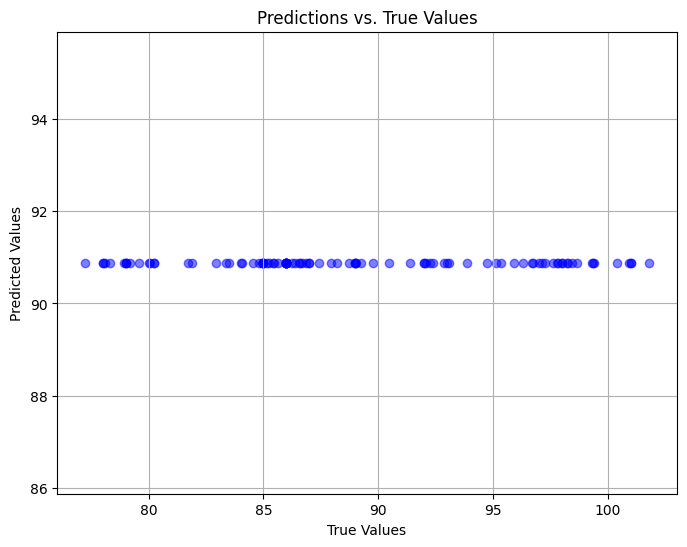

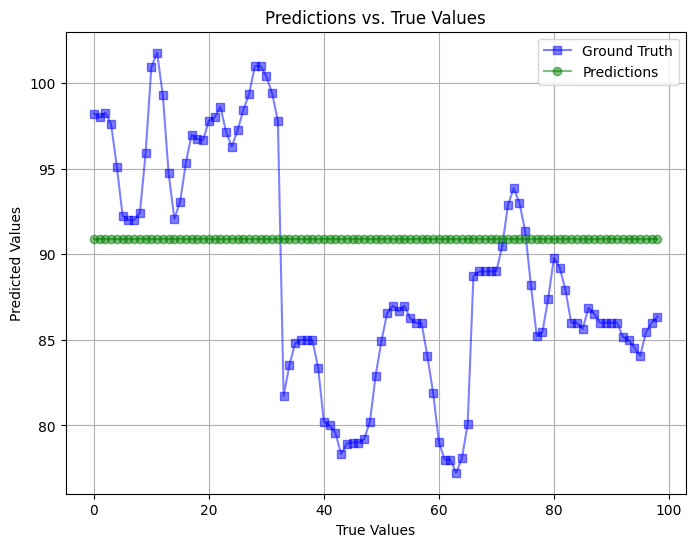

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt


# # Load the saved model's state dictionary
model_state_dict = torch.load('/content/drive/MyDrive/1 Google Colab/CNN Internship/Implementation 2 11-08-2023/conv_lstm_model_1(1).pth')
model_new = ConvLSTMModel(sequence_length, pixel_size, pixel_size)
model_new.load_state_dict(model_state_dict)
model_new.eval()  # Set the model in evaluation mode

# Define Mean Squared Error (MSE) loss function
loss_fn = nn.MSELoss()
# Define a list to store evaluation losses
test_evaluation_losses = []

if torch.cuda.is_available():
    model_new.cuda()

# Define lists to store predicted and true values for visualization
test_predicted_values = []
test_true_values = []

# Loop through the list of directories for evaluation
for directory_path in included_directory_testSet:
    test_dataset = HeartRateDataset(directory_path, pixel_size, sequence_length)
    test_data_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

    with torch.no_grad():
        for video_clips, batch_labels in test_data_loader:
            if video_clips is not None and batch_labels is not None:
                if torch.cuda.is_available():
                  video_clips = video_clips.cuda()
                  batch_labels = batch_labels.cuda()
                # video_clips = torch.stack(video_clips)
                # batch_labels = torch.stack(batch_labels)

                batch_labels = batch_labels.mean(dim=1, keepdim=True)

                # Forward pass to get predictions
                predictions = model_new(video_clips)

                # Compute the loss using Mean Squared Error (MSE) loss
                loss = loss_fn(predictions, batch_labels)

                # Accumulate evaluation loss
                test_evaluation_losses.append(loss.item())

                # Store predicted and true values for visualization
                test_predicted_values.extend(predictions.tolist())
                test_true_values.extend(batch_labels.tolist())

# Calculate average evaluation loss
average_evaluation_loss = sum(test_evaluation_losses) / len(test_evaluation_losses)

# Print the results
print(f"Average Evaluation Loss: {average_evaluation_loss}")

# Visualize predictions vs. true values using a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(test_true_values, test_predicted_values, color='blue', marker='o', alpha=0.5)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Predictions vs. True Values")
plt.grid(True)
plt.show()

true_values_array = np.array(test_true_values)
predicted_values_array = np.array(test_predicted_values)
# Visualize predictions vs. true values using a scatter plot
plt.figure(figsize=(8, 6))
plt.plot(true_values_array.flatten(), color='blue', marker='s', alpha=0.5, label = 'Ground Truth')
plt.plot(predicted_values_array.flatten(), color='green', marker='o', alpha=0.5, label = 'Predictions')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Predictions vs. True Values")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
true_values_array = np.array(test_true_values)
predicted_values_array = np.array(test_predicted_values)
# Visualize predictions vs. true values using a scatter plot
plt.figure(figsize=(8, 6))
plt.plot(true_values_array.flatten(), color='blue', marker='s', alpha=0.5, label = 'Ground Truth')
plt.plot(predicted_values_array.flatten(), color='green', marker='o', alpha=0.5, label = 'Predictions')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Predictions vs. True Values")
plt.grid(True)
plt.legend()
plt.show()